## A Regression Model to Predict House Prices using California Housing Dataset.

 My focus on this model is to build a robust Machine Learning model that predicts the housing prices in Califonia in US. The data was collected by US Census Bureau in 1990.

 This data has metrics such as the population, median income, median hous‐
ing price, and so on for each block group in California. Block groups are the smallest
geographical unit for which the US Census Bureau publishes sample data (a block
group typically has a population of 600 to 3,000 people).

Basically each instance(row) in the data contains data from a block group.

Each step taken to build the Machine Learning model is discussed below.

In [70]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#load data
housing = pd.read_csv("carlifonia_housing.csv")

In [8]:
#first five datasets
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [5]:
#dimension
housing.shape

(20640, 10)

In [7]:
#description of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


#### Notes;
- There are 20,640 instances in the data and 10 features.

- There are some missing data in the feature 'total_bedrooms'

- All attributes are numerical, in exception of the 'ocean_proximity' feature which contains text vales.


In [9]:
#find out what categories exist in 'ocean_proximity' feature & how many block groups belong to each
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
#summary of numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


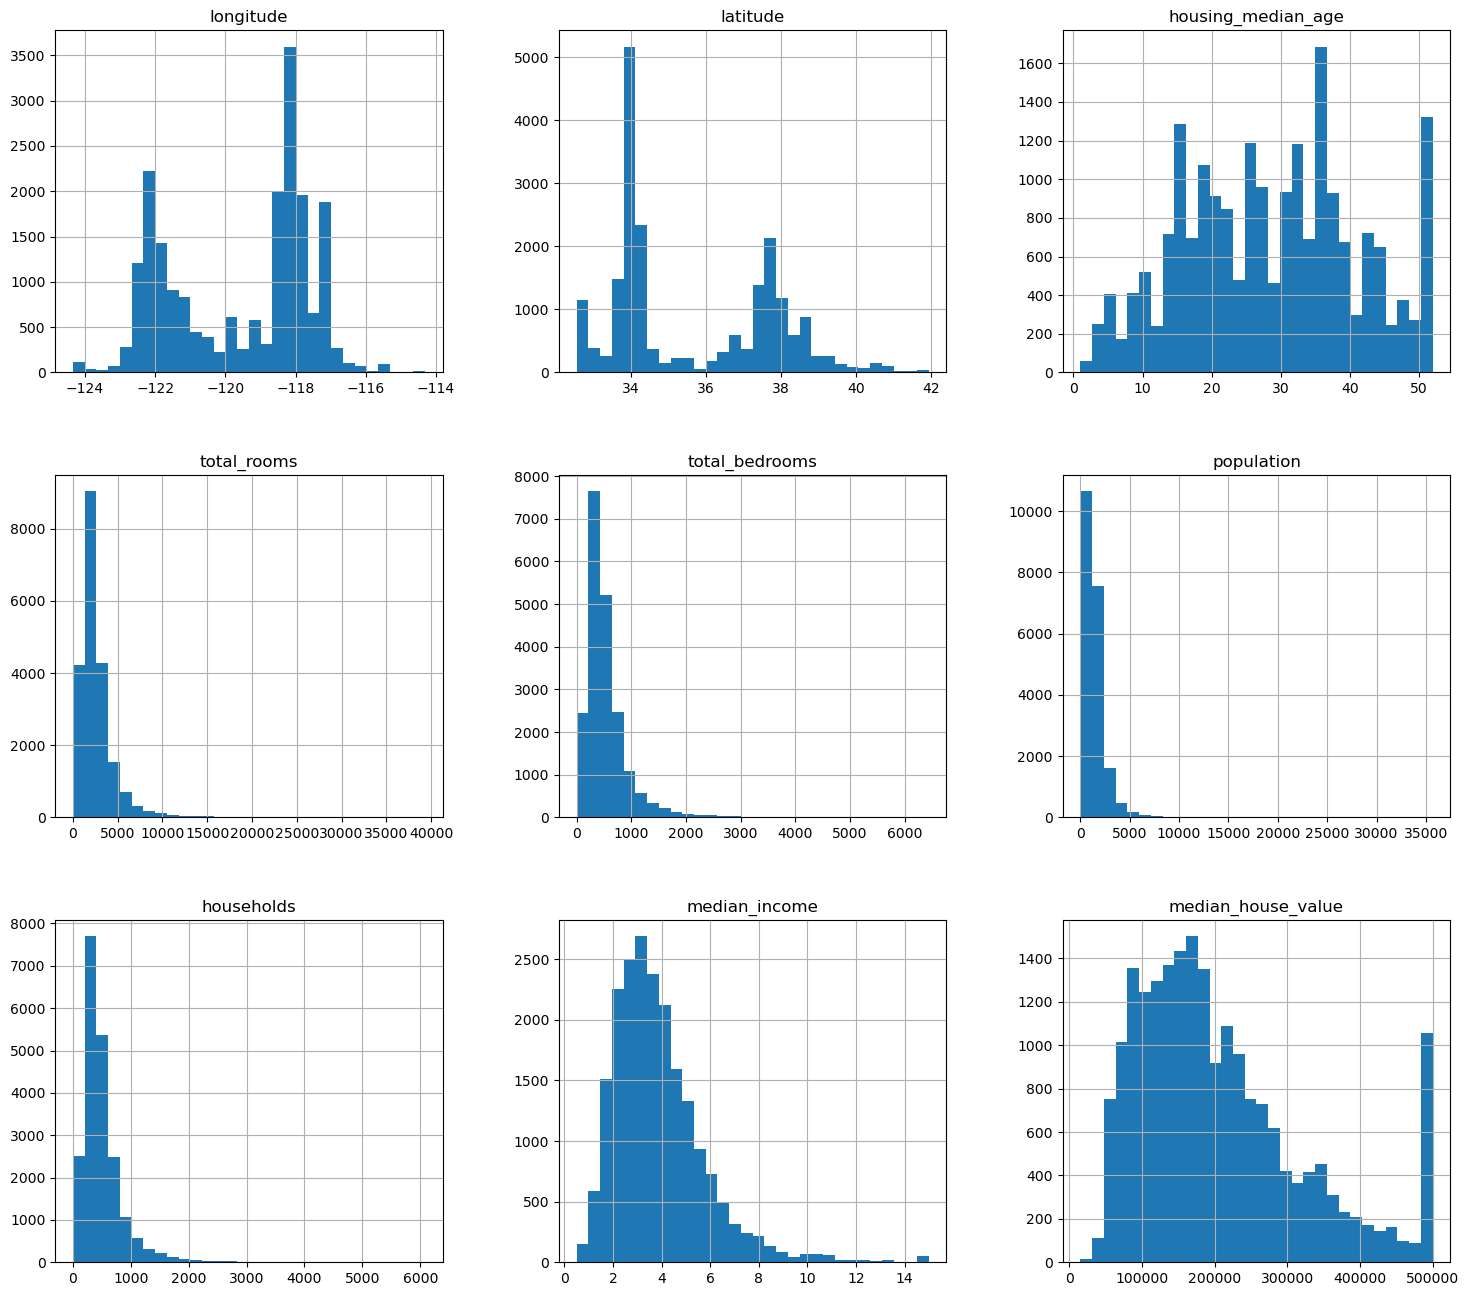

In [17]:
#visualizing distribution of the data
housing.hist(bins=30,figsize=(18,16));

##### Split the data.
Create a function to split the data randomly into train and test sets.

Set up a random seed so that you obtain the same set of data avery time you run the function.

In [33]:
#function to randomly split the dataset into train and test sets
def split_train_test(data, test_ratio):
    
    np.random.seed(20)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [34]:
train_set, test_set = split_train_test(housing, 0.2)

In [36]:
print('The dimension of the training data is: {} '.format(len(train_set)))

The dimension of the training data is: 16512 


In [37]:
print('The dimension of the test data is: {} '.format(len(test_set)))

The dimension of the test data is: 4128 


In [38]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7728,-118.13,33.92,28,3069,864.0,1932,835,2.4925,177200,<1H OCEAN
14565,-117.20,32.84,32,2033,394.0,989,389,3.2583,181400,NEAR OCEAN
8099,-118.22,33.81,41,726,166.0,602,183,3.7885,156900,NEAR OCEAN
4772,-118.34,34.04,42,1681,360.0,987,337,2.6000,171400,<1H OCEAN
11663,-118.02,33.85,31,1922,329.0,1030,353,5.3416,213000,<1H OCEAN


In [39]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7728,-118.13,33.92,28,3069,864.0,1932,835,2.4925,177200,<1H OCEAN
14565,-117.20,32.84,32,2033,394.0,989,389,3.2583,181400,NEAR OCEAN
8099,-118.22,33.81,41,726,166.0,602,183,3.7885,156900,NEAR OCEAN
4772,-118.34,34.04,42,1681,360.0,987,337,2.6000,171400,<1H OCEAN
11663,-118.02,33.85,31,1922,329.0,1030,353,5.3416,213000,<1H OCEAN


##### Create a new Income Category Attribute
The aim of this new attribute is to ensure that the test data is represenative of various categories of incomes in the whole dataset.

In [46]:
housing['income_cat'] = pd.cut(housing['median_income'],
                            bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
                            labels= [1,2,3,4,5])

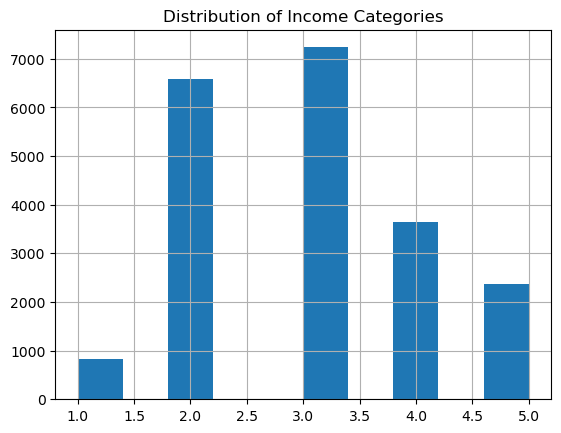

In [49]:
housing["income_cat"].hist()
plt.title('Distribution of Income Categories');

##### Perform Statified Samplling

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=20)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [55]:
#income category proportions in the test set in percentage form
strat_test_set["income_cat"].value_counts() / len(strat_test_set) * 100

3    35.053295
2    31.879845
4    17.635659
5    11.434109
1     3.997093
Name: income_cat, dtype: float64

### Exploratory Data Analysis

In [56]:
data1 = strat_train_set.copy()

In [57]:
data1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
9298,-122.56,38.03,34,1887,290.0,815,283,6.5249,324800,NEAR BAY,5
1956,-120.76,38.73,17,512,129.0,314,140,1.5625,108300,INLAND,2
13412,-117.48,34.08,28,1922,382.0,1565,340,3.9150,117400,INLAND,3
11255,-117.98,33.81,28,3528,816.0,2304,764,2.5820,181800,<1H OCEAN,2
9113,-118.21,34.56,12,2472,408.0,1048,380,4.7097,262100,INLAND,4


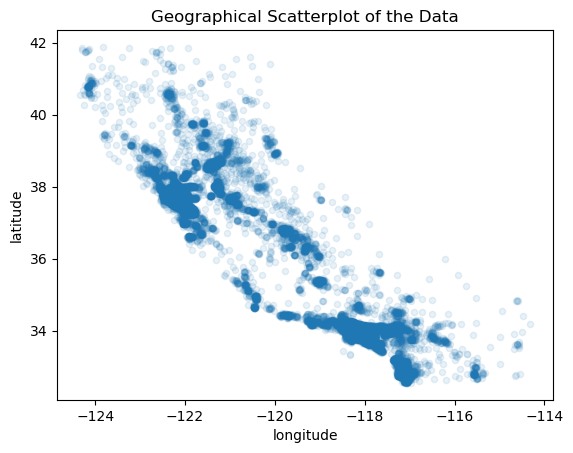

In [63]:
#scatter plot of the geographical data
data1.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.title('Geographical Scatterplot of the Data');

##### Notes;
In conjuction with the map of California, high-density areas are Bay Area and around Los Angeles and San Diego along with areas around Sacramento and Frenso.

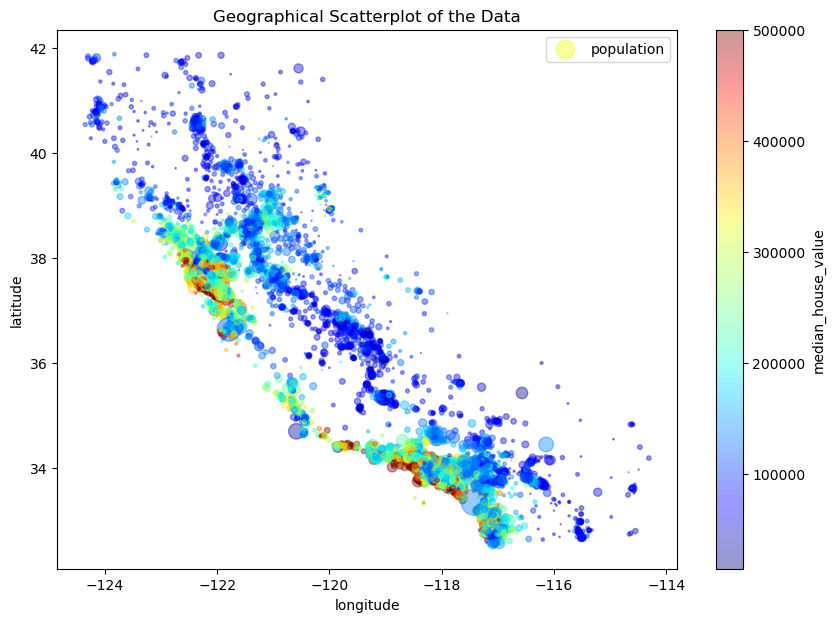

In [69]:
data1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=data1["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.title('Geographical Scatterplot of the Data')
plt.legend();

##### Notes;
This scatterplot tells us that the housing prices are related to the location (i.e close to the ocean) and the population density.

##### Investigating correlation among numerical variables.

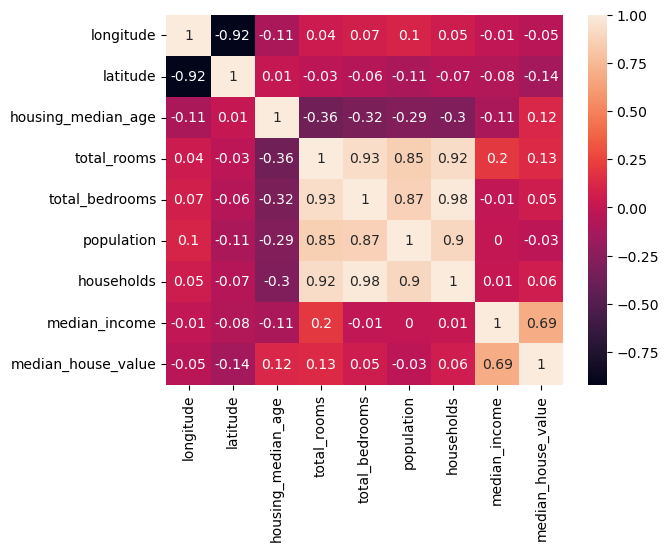

In [73]:
#plot a heatmap
correlation_matrix = data1.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True);

##### Notes;
We notice instances of hisgh positive correlation of the attributes: total_bedrooms, total_rooms and households with population.

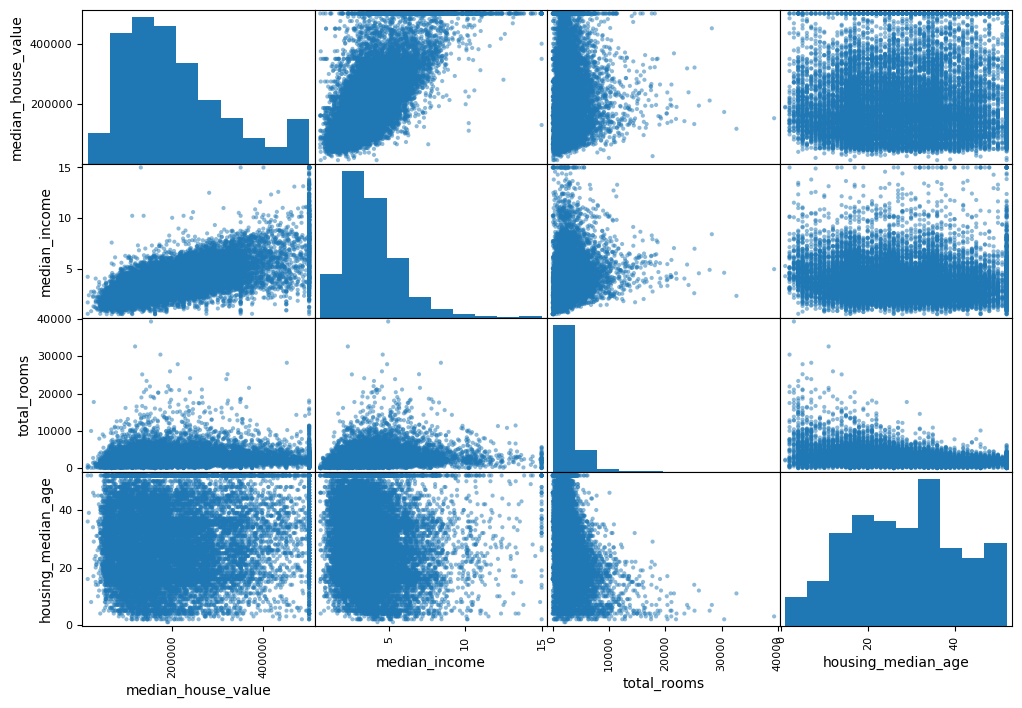

In [74]:
#scatter matrix
from pandas.plotting import scatter_matrix

features = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(data1[features], figsize=(12,8));

##### Notes;
There seems to be a very high positive correlation between median_income and median_house_value. 

Plot a separate scatter plot for these two feafures so as to have a closer look at them.

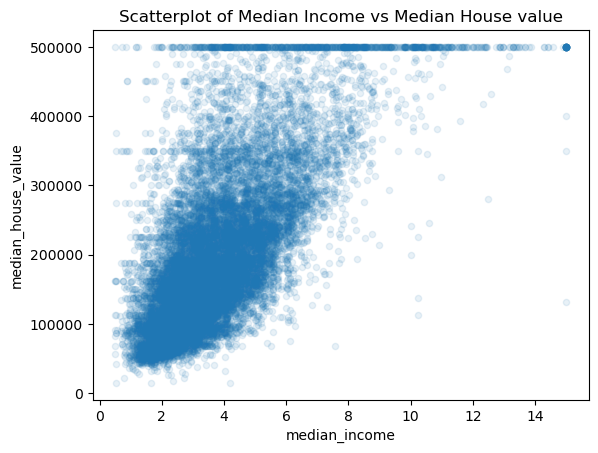

In [79]:
#scatterplot
data1.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.title('Scatterplot of Median Income vs Median House value');

###### Notes;
The house prices seem to be capped at the 500,000 mark. Also, we notice horizontal lines at around 450,000, another at around 350,000 and at 280,000.

It is of importnace that these instances are removed from the data so that the algorithims does not pick up these values.

#### Experimenting Attributes combination
This is an attempt to combine different attributes so as to obtain more meaningful information about them.

In [80]:
#creating new features
data1["rooms_per_household"] = data1["total_rooms"]/data1["households"]
data1["bedroooms_per_room"] = data1["total_bedrooms"]/data1["total_rooms"]
data1["population_per_household"] = data1["population"]/data1["households"]

In [85]:
#correlation matrix
corr_matrix = data1.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686379
rooms_per_household         0.144665
total_rooms                 0.131806
housing_median_age          0.116048
households                  0.063182
total_bedrooms              0.046345
population_per_household   -0.021889
population                 -0.030131
longitude                  -0.047162
latitude                   -0.141972
bedroooms_per_room         -0.254519
Name: median_house_value, dtype: float64

In [87]:
#revert to a clean training set
df = strat_train_set.drop("median_house_value", axis=1)
df_labels = strat_train_set["median_house_value"].copy()

### Data Wrangling

In [88]:
#handling missing values in the data
from sklearn.impute import SimpleImputer

#create an instance
imputer = SimpleImputer(strategy="median")

In [89]:
#create dataset consisting of numerical values only
df_num = df.drop("ocean_proximity", axis=1)

In [90]:
#fit the imputer instance to the training data
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [91]:
#apply the imputer to all the numerical attributes
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2127.    ,  435.    , 1163.    ,
        410.    ,    3.5377,    3.    ])

In [96]:
X = imputer.transform(df_num)

In [97]:
df_val =pd.DataFrame(X, columns=df_num.columns)

In [99]:
df_val.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-122.56,38.03,34.0,1887.0,290.0,815.0,283.0,6.5249,5.0
1,-120.76,38.73,17.0,512.0,129.0,314.0,140.0,1.5625,2.0
2,-117.48,34.08,28.0,1922.0,382.0,1565.0,340.0,3.9150,3.0
3,-117.98,33.81,28.0,3528.0,816.0,2304.0,764.0,2.5820,2.0
4,-118.21,34.56,12.0,2472.0,408.0,1048.0,380.0,4.7097,4.0


In [100]:
df_val.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
income_cat            0
dtype: int64

In [103]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'income_cat'],
      dtype='object')

#### Handling Text and Categorical Variables

In [106]:
df_cat = df[["ocean_proximity"]]
df_cat.head(10)

,ocean_proximity
9298,NEAR BAY
1956,INLAND
13412,INLAND
11255,<1H OCEAN
9113,INLAND
18897,NEAR BAY
9354,NEAR BAY
4531,<1H OCEAN
493,NEAR BAY
19047,INLAND


In [107]:
#converting text values to numbers
from sklearn.preprocessing import OrdinalEncoder

#instantiating an instance
ordinal_encoder = OrdinalEncoder()

In [108]:
#encoding
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded[:10]

array([[3.],
       [1.],
       [1.],
       [0.],
       [1.],
       [3.],
       [3.],
       [0.],
       [3.],
       [1.]])

In [113]:
df_cat["ocean_proximity"].nunique()

5

In [114]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Performing One-Hot Encoding.

Create one binary attribute per category: one attribute equal to 1 when the category
is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is
“INLAND” (and 0 otherwise), and so on. 

In [115]:
from sklearn.preprocessing import OneHotEncoder

#create an instance
cat_encoder = OneHotEncoder()

In [116]:
#fit and transform
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

##### Transformation Pipelines

In [123]:
#transformation pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    #('attrib_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

hse_num_pipeline = num_pipeline.fit_transform(df_num)

In [125]:
#using one transformer for both categorical and numerical columns
from sklearn.compose import ColumnTransformer

num_attrib = list(df_num)
cat_attrib = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attrib),
    ('cat', OneHotEncoder(), cat_attrib)
])

df_clean = full_pipeline.fit_transform(df)

### Model Selection & Training 

In [127]:
#training a model and evaluating on the training set
from sklearn.linear_model import LinearRegression

#create an instance
lin_reg = LinearRegression()
lin_reg.fit(df_clean, df_labels)

LinearRegression()

In [132]:
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data )

print("Predictions", lin_reg.predict(some_data_prepared))

print("Labels", list(some_labels))

Predictions [344536.8303595   30707.46541204 139377.43135295 169503.81194484
 187518.89755729]
Labels [324800, 108300, 117400, 181800, 262100]


In [133]:
from sklearn.metrics import mean_squared_error

df_predictions = lin_reg.predict(df_clean)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68564.62943043682

##### Notes;

Median value for houses ranges between 125000 usd and 265000 usd, therefore, an error of about 68564 usd is not appropriate.

The model is likely to be underfit, therefore it is ideal that we explore other models that may give better performance.

In [135]:
#train a decision tree regressor which is able to find non-linear relationship in the data
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_clean, df_labels)

DecisionTreeRegressor()

In [137]:
#evaluate model performance
df1_predictions = tree_reg.predict(df_clean)
tree_mse = mean_squared_error(df_labels,df1_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [139]:
#using cross validation to evaluate performance of decision tree
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_clean, df_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_mse_scores = np.sqrt(-scores)

In [145]:
#obtain results
def display_scores(scores):
    print("Scores: ", scores) 
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())
    
    
display_scores(tree_mse_scores)

Scores:  [65223.39247774 63653.94654072 66342.37170361 68324.07766857
 67555.69986174 69477.96612957 67904.571019   72035.26620282
 66780.01024392 71214.09878455]
Mean:  67851.14006322544
Standard Deviation:  2443.8078405017586


In [146]:
#compute results for linear model
lin_scores = cross_val_score(lin_reg, df_clean, df_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [64395.58206592 67488.79332072 69336.78561432 67095.90005977
 68683.50497078 67490.66642203 67606.59314343 71242.06383333
 68259.76329287 75594.39548264]
Mean:  68719.40482058242
Standard Deviation:  2825.1864848578157


In [149]:
#ensemble learning
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(df_clean, df_labels)

RandomForestRegressor()

In [154]:
forest_scores = cross_val_score(forest_reg, df_clean, df_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse = np.sqrt(-forest_scores)
forest_rmse
display_scores(forest_rmse)

Scores:  [46714.38333969 47271.74232347 50189.29641508 48621.72340524
 47849.82131633 50054.95955347 46469.79162307 52563.23857078
 46325.37194261 52455.32543553]
Mean:  48851.56539252814
Standard Deviation:  2239.988666266136


##### Notes;
The performance of Random Forest is much better and looks promising.

### Fine Tuning the Model.

In [158]:
#grid search
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                            scoring='neg_mean_squared_error',
                            return_train_score=True)

grid_search.fit(df_clean, df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [159]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [160]:
#evaluation scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63814.05749488075 {'max_features': 2, 'n_estimators': 3}
56074.39088450809 {'max_features': 2, 'n_estimators': 10}
53772.382845193446 {'max_features': 2, 'n_estimators': 30}
60470.14215957073 {'max_features': 4, 'n_estimators': 3}
54007.29919953772 {'max_features': 4, 'n_estimators': 10}
51863.7941434867 {'max_features': 4, 'n_estimators': 30}
58772.93735940985 {'max_features': 6, 'n_estimators': 3}
53476.57405235556 {'max_features': 6, 'n_estimators': 10}
51253.42426028498 {'max_features': 6, 'n_estimators': 30}
58788.01426559963 {'max_features': 8, 'n_estimators': 3}
52688.481090917114 {'max_features': 8, 'n_estimators': 10}
50455.65925705546 {'max_features': 8, 'n_estimators': 30}
62459.96454252777 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55055.74242165072 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61458.91201338115 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53942.89365730301 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [161]:
#analyzing best models and their importance
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([9.76457856e-02, 8.99318040e-02, 5.64247024e-02, 2.97082169e-02,
       2.96525637e-02, 4.14149529e-02, 2.66311638e-02, 3.30463165e-01,
       1.53073602e-01, 9.32749302e-03, 1.25670093e-01, 6.00427189e-05,
       2.43416123e-03, 7.56225459e-03])

In [163]:
#display importance scores next to their corresponding attribute names
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attrib + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.33046316454463787, 'median_income'),
 (0.15307360150567165, 'income_cat'),
 (0.12567009320093506, 'pop_per_hhold'),
 (0.09764578557813383, 'longitude'),
 (0.08993180399453733, 'latitude'),
 (0.056424702356475905, 'housing_median_age'),
 (0.04141495285910034, 'population'),
 (0.02970821685288249, 'total_rooms'),
 (0.029652563712843263, 'total_bedrooms'),
 (0.02663116383704248, 'households'),
 (0.009327493023379999, 'rooms_per_hhold'),
 (0.007562254589508538, 'INLAND'),
 (0.0024341612259294707, '<1H OCEAN'),
 (6.004271892166699e-05, 'bedrooms_per_room')]

In [165]:
#evaluate your system on the set
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

50106.03853206936

In [166]:
#computing confidence interval for the generalization error
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                            loc=squared_errors.mean(),
                            scale=stats.sem(squared_errors)))

array([47959.38532765, 52164.42804966])